In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\linet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

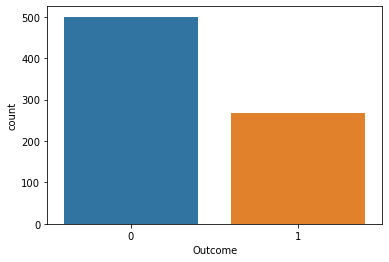

In [8]:
import seaborn as sns
sns.countplot(data['Outcome'], label="Count")

In [9]:
x=data.iloc[:,:8]
y=data.iloc[:,8]

In [10]:
x.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

In [15]:
x_train.shape

(738, 8)

In [16]:
x_test.shape

(30, 8)

In [17]:
y_test.shape

(30,)

In [18]:
y_train.shape

(738,)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
x_train = sc.fit_transform(x_train)

In [22]:
x_test = sc.fit_transform(x_test)

# decisionclassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc=DecisionTreeClassifier(criterion="gini",splitter="random",random_state=0) 

In [25]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0, splitter='random')

In [26]:
y_pred=dtc.predict(x_test)

In [27]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [28]:
y_test

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
417    1
577    1
172    0
352    0
27     0
605    0
239    0
744    0
79     0
496    0
Name: Outcome, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
print("accuracy=",accuracy_score(y_test,y_pred))

accuracy= 0.8666666666666667


In [32]:
cm=confusion_matrix(y_test,y_pred);cm

array([[19,  2],
       [ 2,  7]], dtype=int64)

In [33]:
x = x_train[:,0]
y = x_train[:,1]
x,y
c=y_train

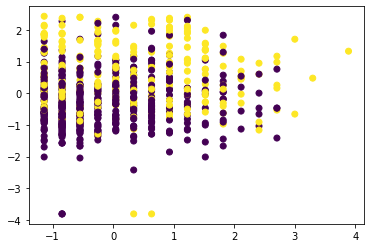

In [34]:
plt.scatter(x,y,c=c)

In [35]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c = y_test

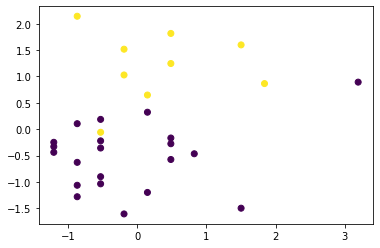

In [36]:
plt.scatter(x,y,c=c)

In [37]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c = y_pred

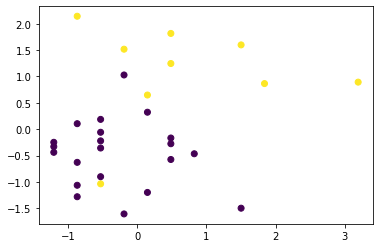

In [38]:
plt.scatter(x,y,c=c)

# RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier(random_state=0)

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [42]:
y_pred=rf.predict(x_test)

In [43]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
y_test

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
417    1
577    1
172    0
352    0
27     0
605    0
239    0
744    0
79     0
496    0
Name: Outcome, dtype: int64

In [45]:
print("accuracy=",accuracy_score(y_test,y_pred))

accuracy= 0.9


In [46]:
cm=confusion_matrix(y_test,y_pred);cm

array([[20,  1],
       [ 2,  7]], dtype=int64)

In [47]:
x = x_train[:,0]
y = x_train[:,1]
x,y
c=y_train

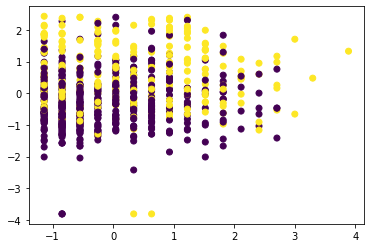

In [48]:
plt.scatter(x,y,c=c)

In [49]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c=y_test

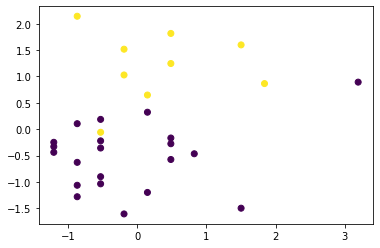

In [50]:
plt.scatter(x,y,c=c)

In [51]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c=y_pred

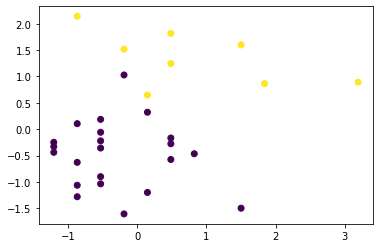

In [52]:
plt.scatter(x,y,c=c)

# support vectors classifier

In [53]:
from sklearn.svm import SVC

In [54]:
svc=SVC()

In [55]:
svc.fit(x_train,y_train)

SVC()

In [56]:
y_pred=svc.predict(x_test)

In [57]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [58]:
y_test

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
417    1
577    1
172    0
352    0
27     0
605    0
239    0
744    0
79     0
496    0
Name: Outcome, dtype: int64

In [59]:
print("accuracy=",accuracy_score(y_test,y_pred))

accuracy= 0.9


In [60]:
cm=confusion_matrix(y_test,y_pred);cm

array([[20,  1],
       [ 2,  7]], dtype=int64)

In [61]:
x = x_train[:,0]
y = x_train[:,1]
x,y
c=y_train

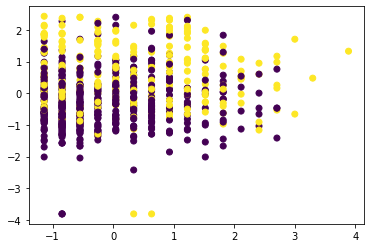

In [62]:
plt.scatter(x,y,c=c)

In [63]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c=y_test

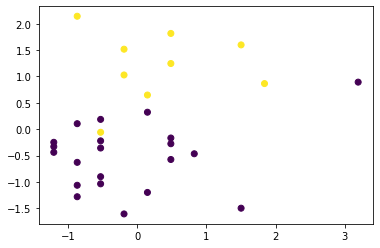

In [64]:
plt.scatter(x,y,c=c)

In [65]:
x = x_test[:,0]
y = x_test[:,1]
x,y
c=y_pred

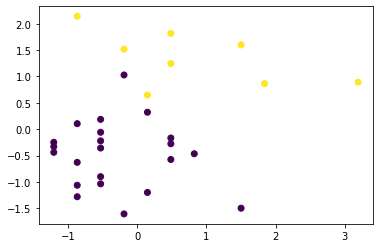

In [66]:
plt.scatter(x,y,c=c)